In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime
from scipy import stats as st
import seaborn as sns

В данном проекте предстоит провести работу по анализу показателей игр и платформ в различных регионах и определить, какие из проектов наиболее перспективны для рекламной компании. В качестве входных данных представлены таблица с выборкой различных характеристик по 16000 игр. В датасете находится информация о названиях игр, жанре, годе выпуска, платорме реализации и
продажах в разных регионах.

Для начала необходимо провести предобработку данных, обработать пустые и пропущенные значения, при необходимости удалить их, 
привести данные к нужным типам и значениям, соответствующим условиям задачи.

Далее приступаем к исследовательскому анализу данных. Для этого необходимо пострить сводные таблицы (по жанрам и платормам) и  подсчет суммарных продаж по всем регионам, содержащихся в изначальной таблице. Также необходимо будет сгруппировать данные по годам для определения актуального периода анализа.

Шаг по анализу данных сходен с работой на предыдущем проекте. Необходимо будет найти показатели выборки, характеризующие средние значения, разброс данных, выбросы. Для наглядного отображения и визуального анализа данных построить гистограммы и описать их.

В задании требуется проверить 2 гипотезы. Для этого необходимо сформулировать нулевую и альтернативную гипотезы, выбрать
критерийпо которому будет проводиться проверка, и его метод, реализованный на языке Pyhton. Также необходимо определить
пороговое значение, по которому будет определяться, принимаем мы нулевую гипотезу либо ее отвергаем.

Целью проводимой работы является определение лучшего для оператора тарифа в плане монетизации на основании анализа
поведения клиентов.

## ШАГ 1 и 2. Aнализ данных и их предобработка

In [2]:
game_rating = pd.read_csv('/datasets/games.csv')
game_rating.info()
display(game_rating.head())

    ### Приведение названий столбцов к нижнему регистру
list_new_columns = []
#print(game_rating.columns)
for new_name in game_rating.columns:
    new_name_lower = new_name.lower()
    list_new_columns.append(new_name_lower)
game_rating.columns = list_new_columns
#display(game_rating.head())

    ### Удаление строк с пропущенными значениями из столбца name (и genre)
#display(game_rating[game_rating['name'].isnull()])
game_rating.dropna(subset = ['name'], inplace = True)
#game_rating.info()

    ### преобразование значений 'tbd' в 'NaN'
#display(game_rating[game_rating['user_score'] == 'tbd'])
game_rating['user_score'] = game_rating['user_score'].replace('tbd', np.nan)
#display(game_rating[game_rating['user_score'] == 'tbd'])
#game_rating.info()

    ### Преобразованние данных к нужному типу
game_rating['user_score'] = game_rating['user_score'].astype('float')
#display(game_rating.head())
#game_rating.info()

    ### Подсчет суммарных продаж во всех регионах
game_rating['all_sales'] = game_rating['na_sales'] + game_rating['eu_sales'] + game_rating['jp_sales'] + game_rating['other_sales'] 
#display(game_rating.head())
#game_rating.info()

#print(game_rating[game_rating['critic_score'].isna()]['year_of_release'].count())
#print(game_rating['year_of_release'].unique())
#print(game_rating[game_rating['user_score'] == 'tbd']['year_of_release'].value_counts())
#print(game_rating[game_rating['rating'].isna()]['year_of_release'].count())




df_copy = game_rating.copy(deep = True) # РЕВЬЮВЕР: создам копиб исходного датафрейма, чтобы показывать альтернативные примеры

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Выводы по шагу 1 и 2

    Для анализа представлена таблица по играм, первая из которых вышла аж в 1980 году. Dataset содержит данные о рейтингах, жанре, платформле использования, а также о прадажах конкретных игр в различных регионах мира. При первом взгляде бросается в глаза большое количество пропущенных значений в полях рейтинга ('Critic_Score', 'User_Score', 'Rating'). В целях упрощения обращения к столбцам таблицы их названия приведены к нижнему регистру. Также приведено к типу 'datetime' значение столбца 'Year_of_Release', хотя и c типом 'int' можно было полноценно работать. Удалены строки с пропущеными значениями в столбце 'Name' (2 строки), поскольку они датированись 1993 годом и не содержали данных о рейтингах и жанре. Строки с пропущенными значениями в поле 'Year_of_Release' я оставил, поскольку их не так много (269 ед.) и они содержат данные о жанрах, продажах и рейтингах, которые пригодятся при анализе. Значение 'tbd' я воспринял как 'To Be Determined' - 'будет определено', т.е. еще не известно, а значит является пустым (неопределенным) значением NaN. Несмотря на большое количество пропущенных значений в полях рейтингов я не стал их удалять или как то еще обрабатывать, поскольку эти данные субъективны, зависят от разных параметров (год выпуска, регион, платформа), и не могут быть усреднены по значениям какого-либо параметра. Также добавлен столбец с общими продажами игр, что поможет определить их популярность по отношению к другим играм. Пропуски возможны, если например игра была популярна только в одном регионе мира, либо её продажи в общем были низкими. Также пропуски значений рейтингов могли появиться у старых игр, поскольку на раннем этапе их выходило не так много и сравнивать просто было не с чем. 

## ШАГ 3. Исследовательский анализ данных

-----------Анализ выпуска игр в различные годы-------------


count      37.000000
mean      444.432432
std       451.604334
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: year_of_release, dtype: float64

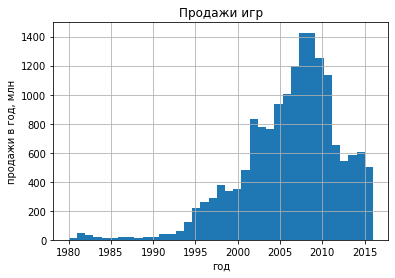

------------------------------------------------------------
-----------Выявление наиболее популярных платформ-------------


year_of_release,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,64.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,all_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


------------------------------------------------------------
--------------Нахождение характерного времени существования платформ----------------
Характерное время существования платформы 11.17 лет
------------------------------------------------------------
------------------------------Выделение актуального периода------------------------------


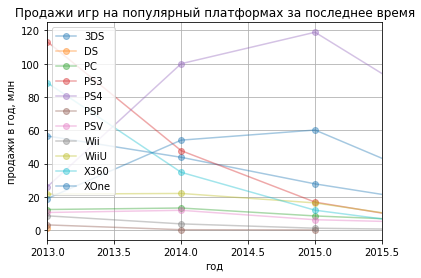

year_of_release,2013.0,2014.0,2015.0,2016.0,all_sales
platform,,,,,
PS4,25.99,100.00,118.90,69.25,314.14
PS3,113.25,47.76,16.82,3.60,181.43
XOne,18.96,54.07,60.14,26.15,159.32
3DS,56.57,43.76,27.78,15.14,143.25
X360,88.58,34.74,11.96,1.52,136.80
WiiU,21.65,22.03,16.35,4.60,64.63
PC,12.38,13.28,8.52,5.25,39.43
PSV,10.59,11.90,6.25,4.25,32.99
Wii,8.59,3.75,1.14,0.18,13.66


year_of_release,2013.0,2014.0,2015.0,2016.0,all_sales
platform,,,,,
PS4,25.99,100.00,118.90,69.25,314.14
PS3,113.25,47.76,16.82,3.60,181.43
XOne,18.96,54.07,60.14,26.15,159.32
3DS,56.57,43.76,27.78,15.14,143.25
X360,88.58,34.74,11.96,1.52,136.80


['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']
------------------------------------------------------------
----------------------------Построение 'ящиков с усами'--------------------------------


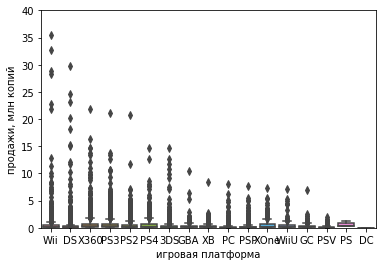

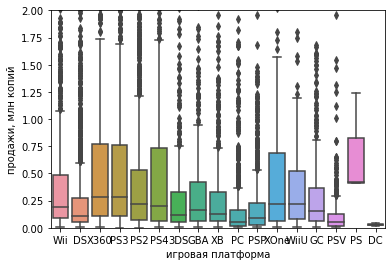

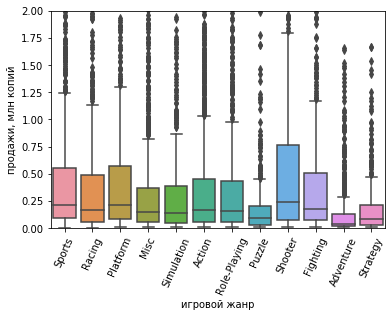

------------------------------------------------------------
---------------------------Определение влияния оценок пользователей и критиков на продажи---------------------------------


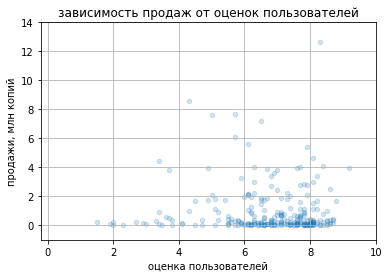

Корреляция от пользовательской оценки -0.031957110204556424


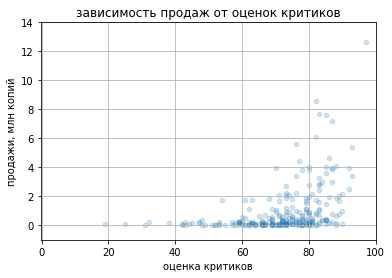

Корреляция от оценки критиков 0.406567902061781
------------------------------------------------------------
---------------------------Анализ игр по жанрам и их доходности---------------------------------


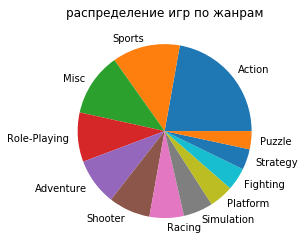

,all_sales,count_games,sales/ex
genre,,,
Shooter,832.59,994,0.837616
Platform,393.09,576,0.682448
Sports,972.91,1614,0.602794
Racing,455.08,818,0.556333
Role-Playing,635.02,1175,0.540443
Action,1346.15,2843,0.473496
Fighting,248.62,539,0.461262
Misc,670.78,1506,0.445405
Simulation,301.68,706,0.427309


------------------------------------------------------------


In [3]:
#game_pivot = game_rating.pivot_table(index = ['name'], columns = 'year_of_release',  values = 'platform', aggfunc = 'count')
#display(game_pivot.head())

    ###Анализ выпуска игр в различные годы
print("-----------Анализ выпуска игр в различные годы-------------")    
display(game_rating['year_of_release'].value_counts().describe())
game_rating['year_of_release'].hist(bins = 37)
plt.title('Продажи игр')
plt.ylabel('продажи в год, млн') 
plt.xlabel('год')
plt.show()
game_rating['year_of_release'].value_counts()

#game_rating.info()
#display(game_rating.head())
print("------------------------------------------------------------")

    ### Выявление наиболее популярных платформ
print("-----------Выявление наиболее популярных платформ-------------")    
game_pivot = game_rating.pivot_table(index = ['platform'], columns = 'year_of_release', values = 'all_sales', aggfunc = 'sum')
display(game_pivot)
game_pivot_sum = game_rating.pivot_table(index = ['platform'],  values = 'all_sales', aggfunc = 'sum').sort_values(by = 'all_sales' ,ascending = False)
display(game_pivot_sum)
print("------------------------------------------------------------")

    ### Построение распределений продаж для наиболее популярных платформ  
#game_pivot.loc['PS2'].plot( style = '-o', alpha = 0.4)
#game_pivot.loc['X360'].plot( style = '-o', alpha = 0.4)
#game_pivot.loc['Wii'].plot( style = '-o', alpha = 0.4)
#game_pivot.loc['PS3'].plot( style = '-o', alpha = 0.4)
#game_pivot.loc['DS'].plot( style = '-o', alpha = 0.4)
#game_pivot.loc['PS'].plot( style = '-o', xlim = (1979, 2017), grid = True, alpha = 0.4)
#plt.legend(['PS2','X360','Wii', 'PS3', 'DS', 'PS'], loc=2)
#plt.title('Продажи игр на популярный платформах')
#plt.ylabel('продажи в год, млн') 
#plt.xlabel('год')
#plt.show()

    ### Нахождение характерного времени существования платформ
print("--------------Нахождение характерного времени существования платформ----------------")      
time_live = []
time_live.append(game_pivot.loc['PS2'].dropna().count())
time_live.append(game_pivot.loc['X360'].dropna().count())
time_live.append(game_pivot.loc['Wii'].dropna().count())
time_live.append(game_pivot.loc['PS3'].dropna().count())
time_live.append(game_pivot.loc['DS'].dropna().count())
time_live.append(game_pivot.loc['PS'].dropna().count())
print('Характерное время существования платформы', np.mean(time_live).round(2), 'лет')
print("------------------------------------------------------------")    
    ### Выделение актуального периода
print("------------------------------Выделение актуального периода------------------------------")    
game_rating = game_rating[game_rating['year_of_release'] > 2002].reset_index(drop = True)

platform_rating_15_16 = game_rating[game_rating['year_of_release'] >= 2013].pivot_table(index = ['platform'],
                                                                columns = 'year_of_release', values = 'all_sales', aggfunc = 'sum')
list_platform = list(platform_rating_15_16.index)
for i in list_platform:
    platform_rating_15_16.loc[i].plot( style = '-o',xlim = (2013, 2015.5), grid = True, alpha = 0.4)
    plt.legend(list_platform, loc=2)
    plt.title('Продажи игр на популярный платформах за последнее время')
    plt.ylabel('продажи в год, млн') 
    plt.xlabel('год')
plt.show()
platform_rating_15_16['all_sales'] = platform_rating_15_16[2013.0] + platform_rating_15_16[2014.0] + platform_rating_15_16[2015.0] + platform_rating_15_16[2016.0]
platform_rating_15_16 = platform_rating_15_16.sort_values(by = 'all_sales', ascending = False)
display(platform_rating_15_16)
list_platform = list(platform_rating_15_16.index)
display(platform_rating_15_16.head())
print(list_platform)
print("------------------------------------------------------------")
   
    ### Построение "ящиков с усами"
print("----------------------------Построение 'ящиков с усами'--------------------------------")    
sns.boxplot(x='platform', y='all_sales', data=game_rating)
plt.ylim([0, 40])
plt.ylabel('продажи, млн копий')
plt.xlabel('игровая платформа')
plt.show()
sns.boxplot(x='platform', y='all_sales', data=game_rating)
plt.ylim([0, 2])
plt.ylabel('продажи, млн копий')
plt.xlabel('игровая платформа')
plt.show()
sns.boxplot(x='genre', y='all_sales', data=game_rating)
plt.ylim([0, 2])
plt.ylabel('продажи, млн копий')
plt.xlabel('игровой жанр')
plt.xticks(rotation=66)
plt.show()
print("------------------------------------------------------------")

    ### Определение влияния оценок пользователей и критиков на продажи
print("---------------------------Определение влияния оценок пользователей и критиков на продажи---------------------------------")    
game_rating[game_rating['platform'] == 'PS4'].plot(y='all_sales', x='user_score', kind='scatter', alpha=0.2, grid=True, xlim = (-0.2, 10), ylim = (-1, 14))
plt.title('зависимость продаж от оценок пользователей')
plt.ylabel('продажи, млн копий')
plt.xlabel('оценка пользователей')
plt.show()
print('Корреляция от пользовательской оценки', 
      game_rating[game_rating['platform'] == 'PS4']['all_sales'].corr(game_rating[game_rating['platform'] == 'PS4']['user_score']))
game_rating[game_rating['platform'] == 'PS4'].plot(y='all_sales', x='critic_score', kind='scatter', alpha=0.2, grid=True, xlim = (-0.2, 100), ylim = (-1, 14))
plt.title('зависимость продаж от оценок критиков')
plt.ylabel('продажи, млн копий')
plt.xlabel('оценка критиков')
plt.show()
print('Корреляция от оценки критиков', 
      game_rating[game_rating['platform'] == 'PS4']['all_sales'].corr(game_rating[game_rating['platform'] == 'PS4']['critic_score']))
print("------------------------------------------------------------")

   ### Анализ игр по жанрам и их доходности
print("---------------------------Анализ игр по жанрам и их доходности---------------------------------")
plt.pie(game_rating['genre'].value_counts(),labels=list(game_rating['genre'].value_counts().index), startangle=360)
plt.title('распределение игр по жанрам')
plt.show()
analise_genre = game_rating.groupby('genre').agg({'all_sales':'sum', 'genre':'count'}).sort_values(by = 'all_sales', ascending =  False)
analise_genre['count_games'] = analise_genre['genre'] 
analise_genre.drop(['genre'], axis = 1, inplace = True)
analise_genre['sales/ex'] = analise_genre['all_sales']/analise_genre['count_games']
display(analise_genre.sort_values(by = 'sales/ex', ascending = False))
print("------------------------------------------------------------")


## Выводы по шагу 3

Проведя анализ распределения выпуска игр по годам, можно сделать вывод о необходимости работы лишь с частью представленных данных. Большой всплеск выпуска игр наблюдается после 2002 года. Именно этот временной период и будем использовать для дальнейшей обработки данных.

Рассмотрев распределение продаж игр по платформам, были выделены наиболее успешные. Для них построено распределение продаж по годам. Оказалось, что наиболее успешные платформы по большей части вышли уже в 21 веке. Если рассматривать только их, то среднее время существования платформы составляет чуть больше 11 лет. Если не брать в расчет платформу PS (наиболее ранняя из успешных), то это время сократиться до 9 лет. 

Анализ двух указанных факторов позволяет выделить АКТУАЛЬНЫЙ ПЕРИОД, необходимый для определения поптенциально успешых игр в будующем. Я бы взял временной период с запасом и оставил бы его равным  лет, т.е. с 2009 по 2016 год (с учетом неполных данных за 2016 год). Соответственно данные за предыдущие года удалим за ненадобностью.

Если смотерть на последние три года, значительный рост продаж показывают 2 платформы: PS4 и XOne. Также значититльными продажами могут похвастаться 3DS, WiiU и PS3, однако за последние годы их показатели снижаются, причем у PS3 в 7 раз!!! WiiU также сильно сдала в последние годы. Так что в качестве перспективных предлагаю выделить платформы PS4, XOne, и 3DS.

In [7]:
# КОД РЕВЬЮВЕРА

# так как предпочтения меняются со временем, то ограничился наиболее свежим периодом

df_copy.query('year_of_release > 2013')[['critic_score', 'user_score', 'all_sales']].corr()

# видим, что как и в частном случае, общий случай сохраняет тенденцию: корреляция с критиками куда лучше, чем с пользователями

,critic_score,user_score,all_sales
critic_score,1.000000,0.50446,0.328105
user_score,0.504460,1.00000,-0.013070
all_sales,0.328105,-0.01307,1.000000


Больше всего игр в жанрах "Action", "Sports", "Misc". Меньше всего разработчики игр уделяли времени жанрам "Puzzle", "Strategy", "Fighting". Также мало игр в жанрах "Platform" и "Simulation". Два самых прибыльных жанра ("Shooter" и "Platform") в расчете на количество произвденных игр находятся по количеству этих самых игр  во второй половине списка. В то время как замыкает тройку жанр "Sports", который и по количеству игр занимает 2-е место. Жанры "Action" и "Misc" по доходности находятся в середине списка, там же где и жанр "Fighting" c одним из самых небольших количеством игр. Можно сказать, что количество произведенных игр в определенном жанре не определяет их доходность.

## Шаг 4. Составление портрета пользователя каждого региона

-------------------------- Определение популярности продаж по платформам в регионах----------------------------------


,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


суммарные продажи в регионе 385.22 млн экз.


,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


суммарные продажи в регионе 333.97 млн экз.


,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


суммарные продажи в регионе 136.59 млн экз.


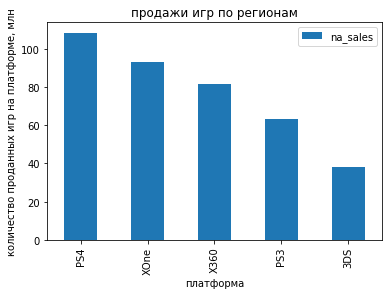

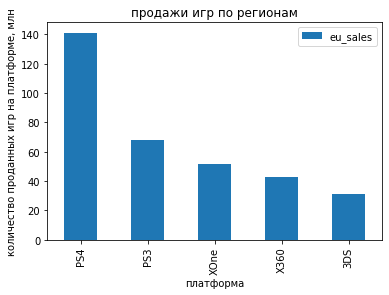

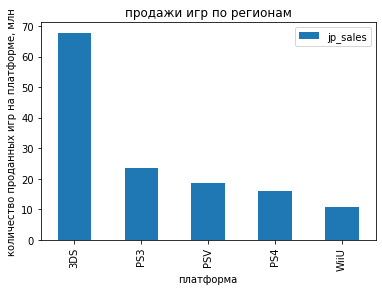

------------------------------------------------------------
---------------------------Определение популярности продаж по жанрам в регионах---------------------------------


,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14


суммарные продажи в регионе 374.95 млн экз.


,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04


суммарные продажи в регионе 323.67 млн экз.


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82


суммарные продажи в регионе 114.99 млн экз.


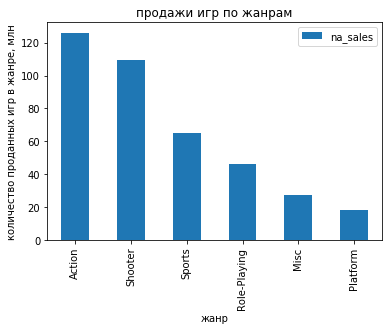

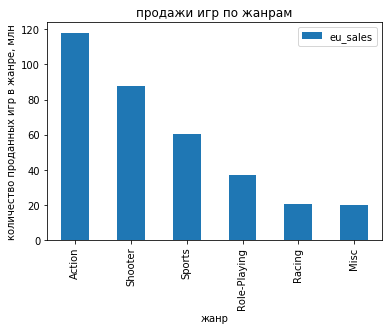

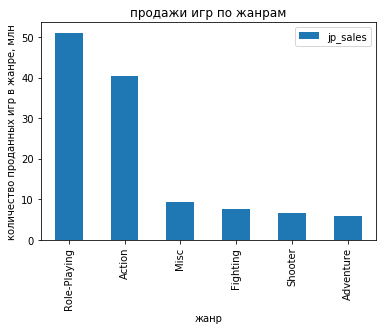

------------------------------------------------------------
---------------------------Определение влияния возрастного рейтинга на продажи игр в регионах---------------------------------


,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


суммарные продажи в регионе 348.29 млн экз.


,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


суммарные продажи в регионе 313.32 млн экз.


,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


суммарные продажи в регионе 55.73 млн экз.


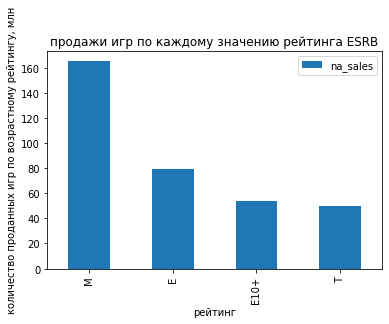

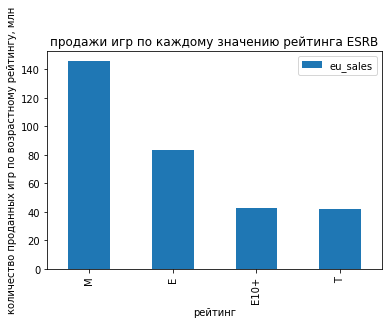

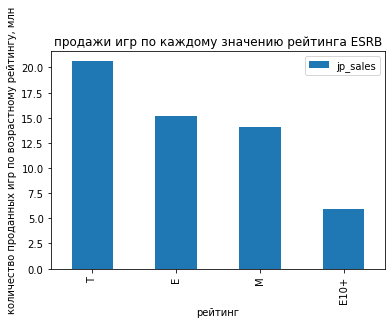

------------------------------------------------------------


In [8]:
region_sales = ['na_sales', 'eu_sales', 'jp_sales']

    ### Определение популярности продаж по платформам в регионах    
print("-------------------------- Определение популярности продаж по платформам в регионах----------------------------------")    
for i in region_sales:
    game_region = game_rating[game_rating['year_of_release'] >= 2013].groupby('platform').agg({i:'sum'}).sort_values(by = i, ascending =  False)
    display(game_region.head())
    print('суммарные продажи в регионе', round(float(game_region.head().sum()),2),'млн экз.')
    game_region.head().plot(kind='bar', stacked=True)
    plt.xlabel('платформа')
    plt.ylabel('количество проданных игр на платформе, млн')
    plt.title('продажи игр по регионам')
plt.show()
print("------------------------------------------------------------")    
   
    ### Определение популярности продаж по жанрам в регионах
print("---------------------------Определение популярности продаж по жанрам в регионах---------------------------------")    
for i in region_sales:
    game_region = game_rating[game_rating['year_of_release'] >= 2013].groupby('genre').agg({i:'sum'}).sort_values(by = i, ascending =  False)
    display(game_region.head(6))
    print('суммарные продажи в регионе', round(float(game_region.head().sum()),2),'млн экз.')
    game_region.head(6).plot(kind='bar', stacked=True)
    plt.xlabel('жанр')
    plt.ylabel('количество проданных игр в жанре, млн')
    plt.title('продажи игр по жанрам')
plt.show()    
print("------------------------------------------------------------")

    ### Определение влияния возрастного рейтинга на продажи игр в регионах
print("---------------------------Определение влияния возрастного рейтинга на продажи игр в регионах---------------------------------")    
for i in region_sales:
    game_region = game_rating[game_rating['year_of_release'] >= 2013].groupby('rating').agg({i:'sum'}).sort_values(by = i, ascending =  False)
    display(game_region.head())
    print('суммарные продажи в регионе', round(float(game_region.head().sum()),2),'млн экз.')
    game_region.head().plot(kind='bar', stacked=True)
    plt.xlabel('рейтинг')
    plt.ylabel('количество проданных игр по возрастному рейтингу, млн')
    plt.title('продажи игр по каждому значению рейтинга ESRB')
plt.show()
print("------------------------------------------------------------")    

## Выводы по шагу 4

    Самые значительные продажи за рассматриваемый период были в регионе NA. На втором месте регион EU. Наименее прибыльным является регион JP, на котором PS в топ-5 представлена  тремя платформами (версии PS2, PS3 и PSV). Для рынка EU характерно большее разнообразие и заметное лидерство платформ PS (PS4 и PS3). Рынок продаж игр для платформ NA превосходит рынок EU на 12%. В топ-5 по популярности здесь те же представители, что и в EU, но PS3 уже не так популярна. Суммарные продажи на рынке JP меньше, чем у лидера в EU - PS4 (136 против 141).
    В регионе NA показатели для продаж по жанрам выше, чем для региона EU, а для региона JP самые маленькие. Причем соотношение сохраненяется, каким оно было для сравнения продаж по платформам. В регионах NA и EU жанры игр и расположение их по популярности в топ-5  практичестки одинаково (Misc и Racing меняютя на 5  местах). В приоритете находятся жанры Action, Shooter, Sports и Role-Playing. На рынке JP безоговорочными лидерами являются жанры Role-playing и Action. Далее следуют не встречавшиеся на рынках NA и EU Fighting и Misc. Shooter`ы здесь не в почете и замыкают топ-5 . 
    Проведя анализ диаграм и таблиц продаж игр в зависмости от рейтинга ESRB в регионах EU и NA наблюдаются общие тенденции. Tоп-4 в данных регионах одинаковы и соотношения мест схожи. На рынке JP рейтинги кардинально отличаются от других регионов. Возможно это связано с отличием в жанрах популярных игр.

## Шаг 5. Проверьте гипотезы

In [10]:
game_rating = game_rating[game_rating['year_of_release'] >= 2013]
user_rating = game_rating[['platform','user_score']].dropna().reset_index(drop = True)
user_rating_genre = game_rating[['genre','user_score']].dropna().reset_index(drop = True)
#user_rating.info()
user_rating_xone = list(user_rating[user_rating['platform'] == 'XOne']['user_score'])
user_rating_genre_action = list(user_rating_genre[user_rating_genre['genre'] == 'Action']['user_score'])
#display(user_rating_xone.head())
#user_rating_xone.info()
user_rating_pc = list(user_rating[user_rating['platform'] == 'PC']['user_score'])
user_rating_genre_sports = list(user_rating_genre[user_rating_genre['genre'] == 'Sports']['user_score'])
#print(user_rating_xone)
#display(user_rating_pc.head())
#user_rating_pc.info()

stat, p = st.levene(user_rating_xone, user_rating_pc)
print('значение для проверки гипотезы о равенстве дисперсий выборок по платформам', p)

stat, p = st.levene(user_rating_genre_action, user_rating_genre_sports)
print('значение для проверки гипотезы о равенстве дисперсий выборок по жанрам', p)

alpha = 0.05

# расчет для сравнения пользовательских рейтиногов платформ "XBox One" и "PC"
results = st.ttest_ind(user_rating_xone, user_rating_pc, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
    
# расчет для сравнения пользоавтельских рейтиногов по жанрам "Action" и "Sports"   
    
results = st.ttest_ind(user_rating_genre_action, user_rating_genre_sports, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

значение для проверки гипотезы о равенстве дисперсий выборок по платформам 0.003897553110130418
значение для проверки гипотезы о равенстве дисперсий выборок по жанрам 4.2566688218274047e-07
p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу
p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


# Общие выводы

В ходе проделанной работы была проведена предобработка данных, изменены типы данных и при необходимости обработаны отсутствующие значения. Значения 'tbd' были определены как отсутствующие. Также расчитан и добавлен столбец с общими продажами игр по всем регионам "all_sales". Проведен глобальный исследовательский анализ данных. В результате рассмотрения распределения продаж игр по платформам и наиболее успешных игр, определен актуальный период для дальнейшего изучения (13 лет). Остальные данные не представляют интереса для ответа на поставленные вопросы. Определены наиболее перспективные в последнее время платформы. Ими стали PS4, XOne, и 3DS. Построены "ящики с усами" для каждой платформы, которые позволили оценить влияние выбросов на общие тенденции в игровой индустрии (они в основном и определяют общие продажи по платформам). Также описана интересная ситуация с платформой PS. По построенным диаграммам рассеяния выявлена зависимость продаж игр и оценок критиков (но не оценок пользователей). Оценена доходность игр в зависимости от их жанра. Самыми доходными в общем плане оказались "экшны", спортивные симуляторы и шутеры. Что касается продаж на одну выпущеную игру, тут лидируют шутеры. Что касается портертов игроков из разных регионов, ориентироваться перспективней на регион NA, платфомы X360, PS3, жанры "Action" "Sports" "Shooter" и может быть "Role-Playing" для рынка JP. В ходе проверки гипотез были ответргнуты обе. Что интересно, для одной из них отклонения от среднего генеральных совокупностей оказались равными при определении по методу Левене.         